## run this to get train val loss curve

Unet non-hierarchical

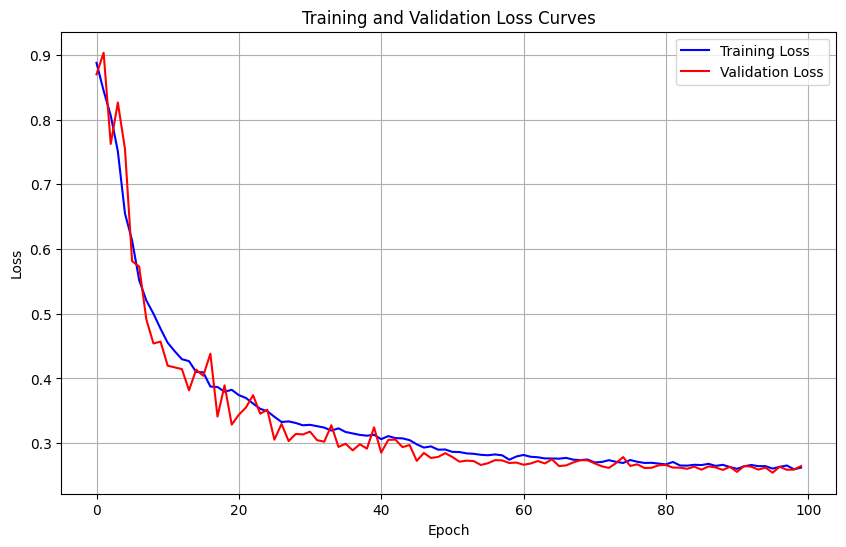

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = "C:/Users/rb01243/OneDrive - University of Surrey/Documents/GitHub/OC CODE/Bone_Loss_Final/Restrictive-Hierarchical-Code/runs/unet_orig_weighted/_1/metrics.csv"
df = pd.read_csv(file_path)

# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot training loss
plt.plot(df['Train Loss'], label='Training Loss', color='blue')

# Plot validation loss
plt.plot(df['Val Loss'], label='Validation Loss', color='red')

# Customize the plot
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Unet hierarchical

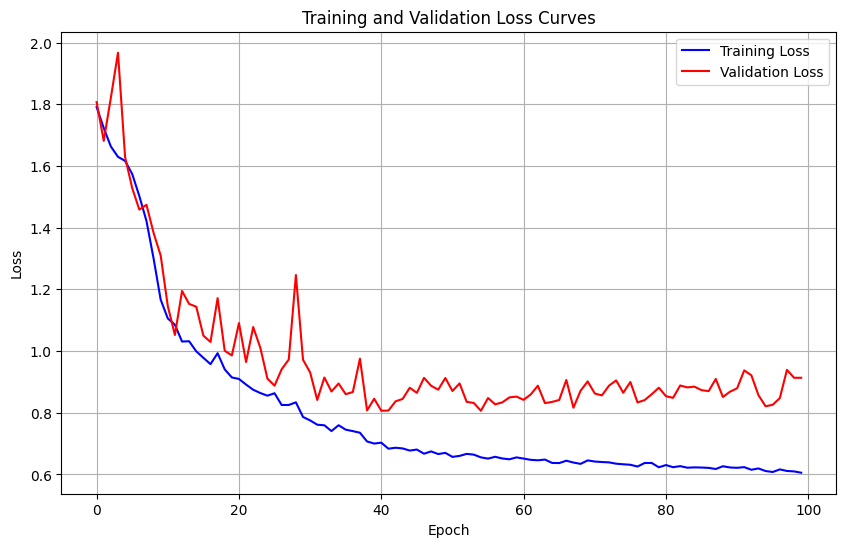

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = "C:/Users/rb01243/OneDrive - University of Surrey/Documents/GitHub/OC CODE/Bone_Loss_Final/Restrictive-Hierarchical-Code/runs/unet_hier_weighted/_1/metrics.csv"
df = pd.read_csv(file_path)

# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot training loss
plt.plot(df['Train Loss'], label='Training Loss', color='blue')

# Plot validation loss
plt.plot(df['Val Loss'], label='Validation Loss', color='red')

# Customize the plot
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

HRNet non-hierarchical

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = "C:/Users/rb01243/OneDrive - University of Surrey/Documents/GitHub/OC CODE/Bone_Loss_Final/Restrictive-Hierarchical-Code/runs/hrnet_orig_weighted/_1/metrics.csv"
df = pd.read_csv(file_path)

# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot training loss
plt.plot(df['Train Loss'], label='Training Loss', color='blue')

# Plot validation loss
plt.plot(df['Val Loss'], label='Validation Loss', color='red')

# Customize the plot
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

HRNet hierarchical

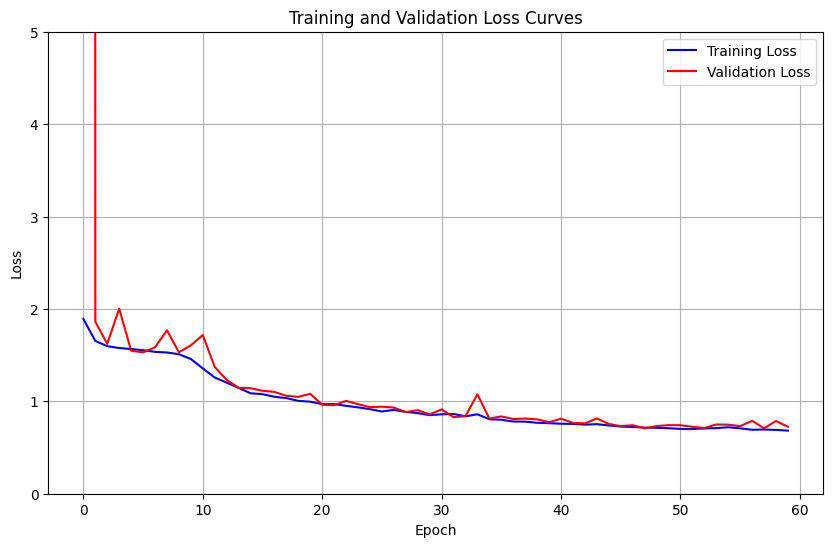

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
file_path = "C:/Users/rb01243/OneDrive - University of Surrey/Documents/GitHub/OC CODE/Bone_Loss_Final/Restrictive-Hierarchical-Code/runs/hrnet_hier_weighted_e2/_1/metrics.csv"
df = pd.read_csv(file_path)

# Create figure and axis
plt.figure(figsize=(10, 6))

# Plot training loss
plt.plot(df['Train Loss'], label='Training Loss', color='blue')

# Plot validation loss
plt.plot(df['Val Loss'], label='Validation Loss', color='red')
plt.ylim(0, 5)
# Customize the plot
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

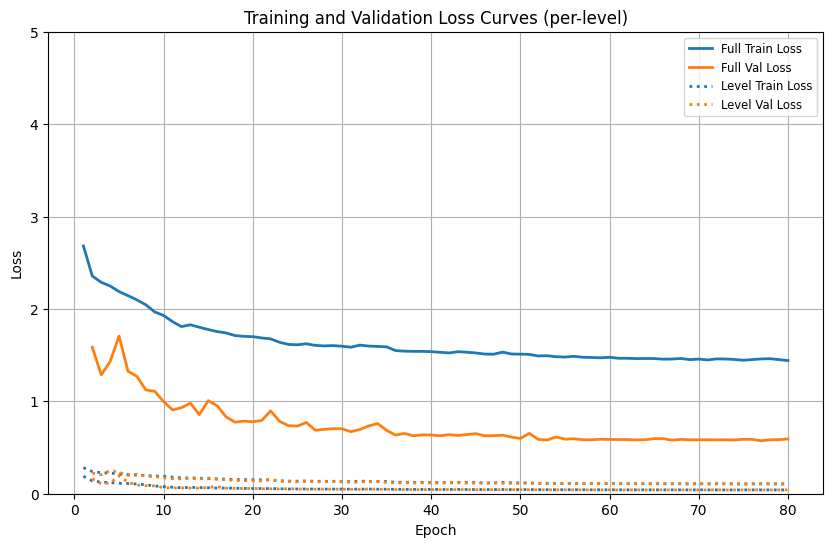

In [7]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

file_path = "C:/Users/rb01243/OneDrive - University of Surrey/Documents/GitHub/OC CODE/Bone_Loss_Final/Restrictive-Hierarchical-Code/runs/hrnet_hier_final/fold_5/metrics.csv"
df = pd.read_csv(file_path)
# assume df, plt and colors are already defined in the notebook
epochs = df['Epoch'] if 'Epoch' in df.columns else (df.index + 1)

def to_list(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception:
            return []
    if isinstance(x, (list, tuple)):
        return list(x)
    return []

train_level_lists = df['Train Level Loss'].apply(to_list).tolist()
val_level_lists = df['Val Level Loss'].apply(to_list).tolist()

# determine number of levels to plot
n_train_levels = max((len(l) for l in train_level_lists), default=0)
n_val_levels = max((len(l) for l in val_level_lists), default=0)
n_levels = max(n_train_levels, n_val_levels)
# assume df, epochs, train_level_lists, val_level_lists, n_levels and plt are defined in the notebook

train_color = 'tab:blue'
val_color = 'tab:orange'

full_style = '-'
level_style = ':'

plt.figure(figsize=(10, 6))

# plot overall full losses (solid)
plt.plot(epochs, df['Train Loss'], label='Full Train Loss', color=train_color, linestyle=full_style, linewidth=2)
plt.plot(epochs, df['Val Loss'],   label='Full Val Loss',   color=val_color,   linestyle=full_style, linewidth=2)

# plot per-level losses (dotted). Use the same label text for each so legend will show a single entry per label.
for i in range(n_levels):
    train_vals = [lvl[i] if i < len(lvl) else float('nan') for lvl in train_level_lists]
    val_vals   = [lvl[i] if i < len(lvl) else float('nan') for lvl in val_level_lists]

    plt.plot(epochs, train_vals, label='Level Train Loss', color=train_color, linestyle=level_style, linewidth=2)
    plt.plot(epochs, val_vals,   label='Level Val Loss',   color=val_color,   linestyle=level_style, linewidth=2)

# build a compact legend with only the four desired entries, in the desired order
handles, labels = plt.gca().get_legend_handles_labels()
handle_map = {lab: h for h, lab in zip(handles, labels)}
desired_labels = ['Full Train Loss', 'Full Val Loss', 'Level Train Loss', 'Level Val Loss']
legend_handles = [handle_map[l] for l in desired_labels if l in handle_map]
plt.ylim(0, 5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves (per-level)')
plt.legend(legend_handles, desired_labels[:len(legend_handles)], loc='best', fontsize='small')
plt.grid(True)
plt.show()
